# HW 22-23

# Imports

In [1]:
# import warnings

import numpy as np
import pandas as pd
# import PIL
from scipy.optimize import minimize
# import sympy as sp
from matplotlib import pyplot as plt

# warnings.filterwarnings("ignore")

# HW 22

In [2]:
# Use a function of your choice to complete this problem.

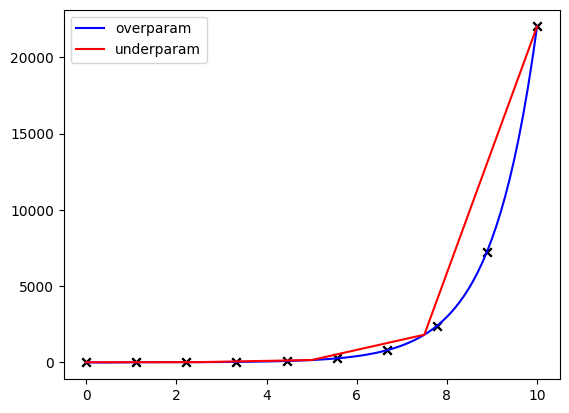

In [3]:
# a. For your function f, generate data according to yi = f(ti) + ϵi where ϵ is Gaussian noise with
# zero mean and standard deviation 0.1. Fit the resulting data using ordinary least squares
# and the monomial basis up to t^8

def your_function_f(t: np.ndarray):
    return np.exp(t)  + np.random.normal(loc=0, scale=0.1)

t = np.linspace(0, 10, 10)
y = your_function_f(t)

def design_mat(k: int, vec) -> np.ndarray:
    """ adapted from HW 13 """
    n = vec.shape[0]
    m = k
    A: np.ndarray = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            A[i, j] = (vec[i])**j ## type: ignore
    return A

A = design_mat(9, t)

theta_hat, sse, rank, s = np.linalg.lstsq(A, y)

t_plt = np.linspace(0, 10, 100)
y_hat = design_mat(9, t_plt)@theta_hat

plt.scatter(t, y, color="black", marker="x")
plt.plot(t_plt, y_hat, color = "blue", label="overparam")

t_plt = np.linspace(0, 10, 5)
y_hat = design_mat(9, t_plt)@theta_hat

plt.scatter(t, y, color="black", marker="x")
plt.plot(t_plt, y_hat, color = "red", label="underparam")

plt.legend()


Text(0.5, 1.0, 'Data')

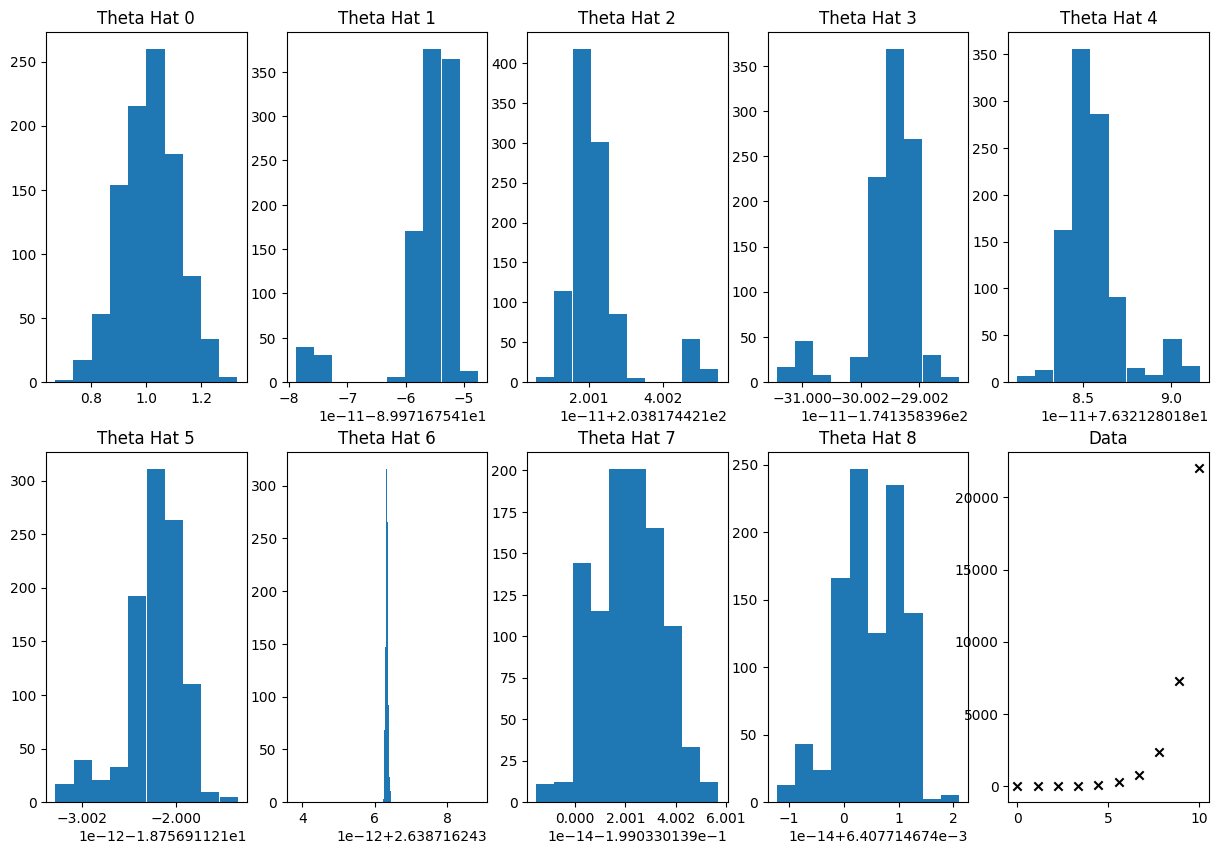

In [4]:
# b. Repeat the fitting above 1000 times (generating new data each time) and create histograms
# for the value of each θ

hist_array = np.zeros((1000, 9))

for i in range(1000):
    y = your_function_f(t)
    theta_hat, sse, rank, s = np.linalg.lstsq(A, y)

    hist_array[i] = theta_hat

fig, ax = plt.subplots(2, 5, figsize=(15,10))
for i, theta_hat_i in enumerate(hist_array.T):
    r, c = 0, i
    if i>=5:
        r=1
        c=i-5
    ax[r,c].hist(theta_hat_i)
    ax[r,c].set_title(f"Theta Hat {i}")

ax[1,4].scatter(t, y, color="black", marker="x")
ax[1,4].set_title("Data")

Text(0.5, 1.0, 'Data')

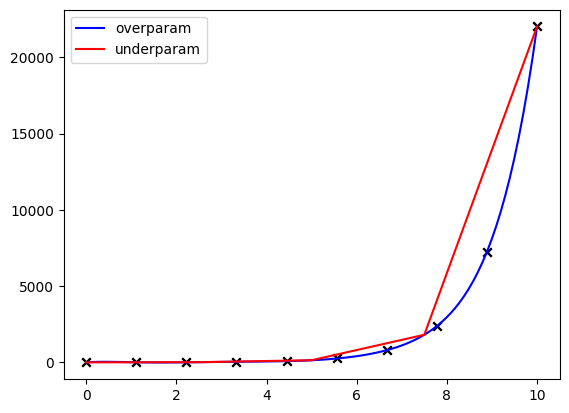

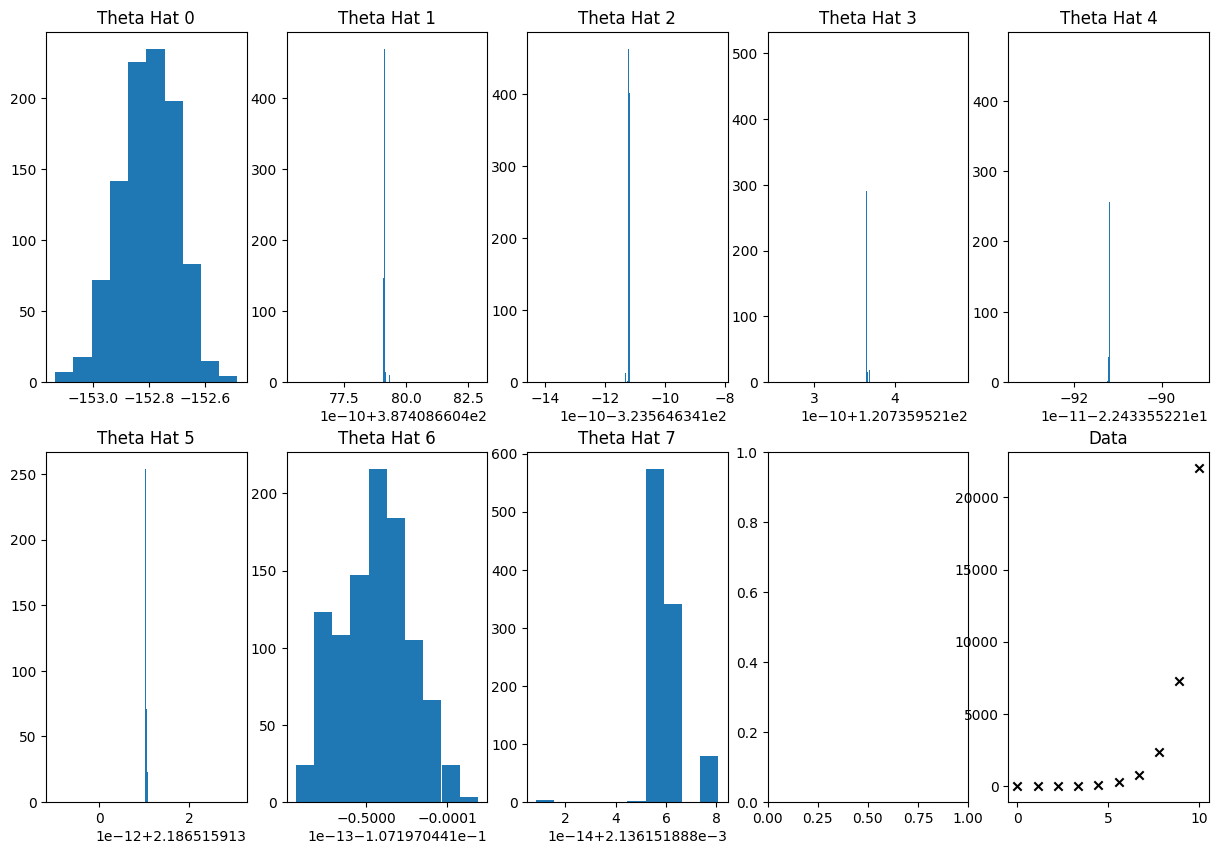

In [5]:
# c. Repeat the previous two parts using the first eight Legendre polynomials

############################################################################################################################################################
# Just copy the code from above setting a new design_mat function
###########################################################################################################################################################
def your_function_f(t: np.ndarray):
    return np.exp(t)  + np.random.normal(loc=0, scale=0.1)

t = np.linspace(0, 10, 10)
y = your_function_f(t)

def design_mat(k: int, vec) -> np.ndarray:
    """ copied from HW 16 """
    A = np.stack([np.polynomial.legendre.Legendre.basis(i)(vec) for i in range(k)]).T
    return A

A = design_mat(8, t)

theta_hat, sse, rank, s = np.linalg.lstsq(A, y)

t_plt = np.linspace(0, 10, 100)
y_hat = design_mat(8, t_plt)@theta_hat

plt.scatter(t, y, color="black", marker="x")
plt.plot(t_plt, y_hat, color = "blue", label="overparam")

t_plt = np.linspace(0, 10, 5)
y_hat = design_mat(8, t_plt)@theta_hat

plt.scatter(t, y, color="black", marker="x")
plt.plot(t_plt, y_hat, color = "red", label="underparam")

plt.legend()

############################################################################################################################################################

hist_array = np.zeros((1000, 8))

for i in range(1000):
    y = your_function_f(t)
    theta_hat, sse, rank, s = np.linalg.lstsq(A, y)

    hist_array[i] = theta_hat

fig, ax = plt.subplots(2, 5, figsize=(15,10))
for i, theta_hat_i in enumerate(hist_array.T):
    r, c = 0, i
    if i>=5:
        r=1
        c=i-5
    ax[r,c].hist(theta_hat_i)
    ax[r,c].set_title(f"Theta Hat {i}")

ax[1,4].scatter(t, y, color="black", marker="x")
ax[1,4].set_title("Data")



In [6]:
# d. What can you conclude about the advantages and disadvantages of using monomials versus
# Legendre polynomials as basis functions?

# The fit for the function is similar when it is over parameterized regardless of which basis is used,
# however, the variance in each value of theta-hat is higher for the monomial basis versus the Legendre basis.
# Said another way, the Legendre basis allows a better fit to the underlying distribution function, while
# the monomial basis captures more nuance between training samples (though in this case the nuance is aeatoric noise).

# HW 23

In [7]:
# Using the data provided in noisy norm data.csv, create a model which uses the first five Legendre
# Polynomials as basis functions. You will want to use functions such as SciPy’s optimize.minimize
# and special.legendre and NumPy’s linalg.norm (or equivalents in the language of your
# choice) to make this problem easier

data = pd.read_csv("./noisy-norm-data.csv", header=None).values

x = data[:, 0]
y = data[:, 1]

def design_mat(k: int, vec) -> np.ndarray:
    """ copied from HW 16 """
    A = np.stack([np.polynomial.legendre.Legendre.basis(i)(vec) for i in range(k)]).T
    return A

A = design_mat(5, t)

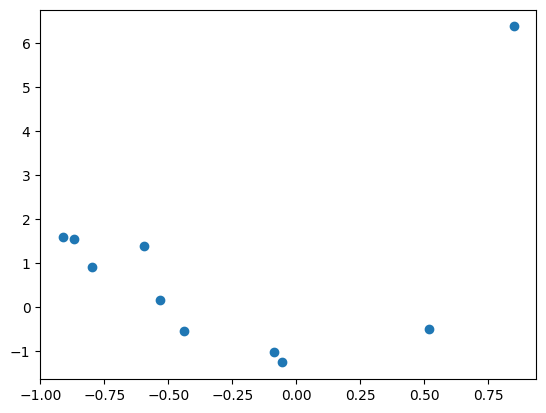

In [8]:
# Initial view of the data

plt.scatter(x, y)

In [9]:
# Initial linear model

initial_theta_guess, *_ = np.linalg.lstsq(A, y)

print("Initial Theta-hat:")
initial_theta_guess

Initial Theta-hat:


array([-0.61940077, -0.02037692,  0.55130716, -0.07964819,  0.0027232 ])

In [10]:
# (a) What coefficients do you find when your error function is the l2 norm of the residual?

def your_error(th_h: np.ndarray):
    p = 2 # order of the norm
    return np.linalg.norm((A@th_h-y), ord=p)

l2_optimization_result = minimize(your_error, initial_theta_guess)

print("L-2 Theta-hat:")
l2_optimization_result.x

L-2 Theta-hat:


array([-0.61940077, -0.02037692,  0.55130716, -0.07964819,  0.0027232 ])

In [11]:
# (b) What coefficients do you find when your error function is the l1 norm of the residual?

def your_error(th_h: np.ndarray):
    p = 1 # order of the norm
    return np.linalg.norm((A@th_h-y), ord=p)

l1_optimization_result = minimize(your_error, initial_theta_guess)

print("L-1 Theta-hat:")
l1_optimization_result.x

L-1 Theta-hat:


array([-0.61940077, -0.02037692,  0.55130711, -0.07964882,  0.00271381])

In [12]:
# (c) What coefficients do you find when your error function is the l∞ norm of the residual?

def your_error(th_h: np.ndarray):
    p = np.inf # order of the norm
    return np.linalg.norm((A@th_h-y), ord=p)

l_inf_optimization_result = minimize(your_error, initial_theta_guess)

print("L-inf Theta-hat:")
l_inf_optimization_result.x

L-inf Theta-hat:


array([-0.61940073, -0.02037673,  0.55130839, -0.07963922,  0.00279206])

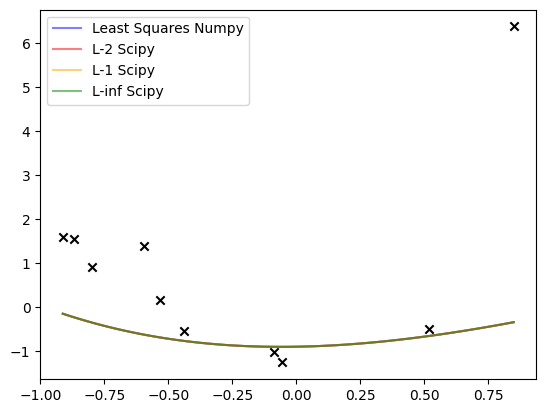

In [13]:
# Let's re-plot the models
plot_x = np.linspace(x.min(), x.max(), 100)
A_plot = design_mat(5, plot_x)
lstsq_y_hat = A_plot@initial_theta_guess
l_2_y_hat = A_plot@l2_optimization_result.x
l_1_y_hat = A_plot@l1_optimization_result.x
l_inf_y_hat = A_plot@l_inf_optimization_result.x

plt.scatter(x, y, color="black", marker="x")
plt.plot(plot_x, lstsq_y_hat, color = "blue", label="Least Squares Numpy", alpha=0.5)
plt.plot(plot_x, l_2_y_hat, color = "red", label="L-2 Scipy", alpha=0.5)
plt.plot(plot_x, l_1_y_hat, color = "orange", label="L-1 Scipy", alpha=0.5)
plt.plot(plot_x, l_inf_y_hat, color = "green", label="L-inf Scipy", alpha=0.5)

plt.legend()

In [14]:
# (d) Which model is “best”? How do you know?

# These models are all nearly identical, so the curves produced by each prediction are overlapping.
# Which norm to use depends on what part of the distribution should be focused on. For example,
# the L-2 norm favors all values equally. In this case, I think that may be the best, because the solutions
# are equivalent but the L-2 norm model has a closed form solution.

# Acknowledgment
Work in this repository and with associated assignments and projects may be adapted or copied from similar files used in my prior academic and industry work (e.g., using a LaTeX file or Dockerfile as a starting point). Those files and any other work in this repository may have been developed with the help of LLM's like ChatGPT. For example, to provide context, answer questions, refine writing, understand function call syntax, and assist with repetitive tasks. In these cases, deliverables and associated work reflect my best efforts to optimize my learning and demonstrate my capacity, while using available resources and LLM's to facilitate the process.


[ChatGPT Conversation](https://chatgpt.com/share/68e6cc49-78e8-8003-a0e5-3a9a04bbba27)